# Outliers

Los outliers son datos que suelen ser muy distintos al resto de los datos.

Un dato puede llegar a ser un outlier por varios motivos:
* Dato erróneo
    * Ingreso manual incorrecto
    
    * Ruido en medición electrónica
 
* Dato falsificado
* Resultado improbable

## Cómo detectarlos?

Dos métodos sencillos que sirven para detectar outliers de una población normalmente distribuida son:
* Rango intercuatilico
* Metodo de las 3 sigmas

Extra:
* z-score

Visualmente:
* Boxplot

### Rango intercuatilico (Metodo Tukey)

1. Determinar Q1 y Q3
2. IQR = Q3 - Q1
3. Umbral Menor = Q1 - k * IQR
4. Umbral Mayor = Q3 + k * IQR
5. Aplicar la mascara. Los puntos menores al Umbral Menor y los mayores al Umbral Mayor se pueden considerar **outliers**

Cuando se grafica un *boxplot* los "bigotes" corresponden a un k = 1.5

### Método de las 3 sigmas

1. Calcular el promedio (mean)
2. Calcular la desviación estandard (std)
3. Calcular el minimo:  mean - 3 * std
4. Calcular el maximo:  mean + 3 * std
5. Aplicar la mascara. Los puntos menores al minimo y los mayores al maximo se pueden considerar **outliers**

**ojo: se asume que es una distribucion normal**

### Método z-score

1. Calcular el promedio (mean)
2. Calcular la desviación estandard (std)
3. Transformar los datos:  (dato - mean)/std
4. Elegir un umbral para buscar outliers

**ojo: se asume que es una distribucion normal**

<img src="1280px-The_Normal_Distribution.svg.png" width='80%'>

Datos cuyos z-score estén debajo de -2 o mayor a 2 se los podria considerar como outliers.  El 95% de los datos tienen un z-score entre -2 y 2

Si se desea descartar menos del 1%, entonces el umbral del z-score sería 2.58

## Visualmente

### Boxplot

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = np.random.normal(0,1,1000)

In [3]:
a = datos.std()

(-4.0, 4.0)

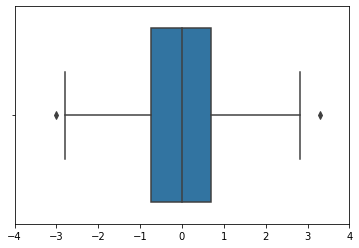

In [4]:
sns.boxplot(x=datos)
plt.xlim(-4, 4)

In [5]:
Q1 = np.percentile(datos, 25)
Q3 = np.percentile(datos, 75)
IQR = Q3 - Q1
print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)
print("Umbral menor: ", Q1 - IQR*1.5)
print("Umbral mayor: ", Q3 + IQR*1.5)

Q1:  -0.7398753670094574
Q3:  0.704042584281631
IQR:  1.4439179512910885
Umbral menor:  -2.9057522939460902
Umbral mayor:  2.8699195112182636


C:\Users\tele\Miniconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-4.0, 4.0)

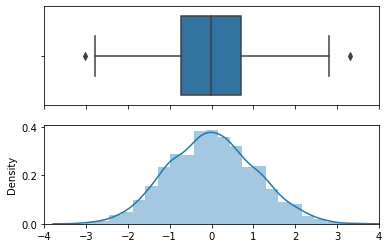

In [6]:
f, axes = plt.subplots(2, 1, sharex=True)
sns.boxplot(x = datos, ax=axes[0])
sns.distplot(datos, ax=axes[1])
plt.xlim(-4,4)

## ANTES DE APLICAR UNO U OTRO MÉTODO, PROBAR LOS SUPUESTOS.

La hipótesis nula de que la muestra ha sido extraída de una población con distribución de probabilidad normal se puede estudiar gráfica y/o analíticamente.

X ~ N ($\mu$,$\sigma$)

Esta definicion de outliers es útil si los datos tienen una distribucion normal. Si no es así, no se puede decir que los datos que están "lejos" sean outliers

# Supuesto de normalidad

Una herramienta visual e interesante es el gráfico cuantil-cuantil, más conocido como **Q-Q Plot**. Consiste en una comparación de los valores observados con los que deberíamos haber obtenido si la distribución de la variable bajo análisis fuese la Normal.

- Cuanto más se peguen los puntos a la línea, mayor aproximación a la normal.

Ejemplos:
<img src="maxresdefault.jpg" width='80%'>


Otra opción es hacer el test de Kolmogorov-Smirnov. Es una prueba no paramétrica que determina la bondad de ajuste de dos distribuciones de probabilidad entre sí.

En el caso de que queramos verificar la normalidad de una distribución, la prueba de Lilliefors conlleva algunas mejoras con respecto a la de Kolmogórov-Smirnov; y, en general, el test de Shapiro–Wilk o la prueba de Anderson-Darling son alternativas más potentes. 

Más información en:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html

`Kstest Perform the Kolmogorov-Smirnov test for goodness of fit. This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). Under the null hypothesis the two distributions are identical, G(x)=F(x). The alternative hypothesis can be either ‘two-sided’ (default), ‘less’ or ‘greater’. The KS test is only valid for continuous distributions.`


RECORDANDO: **El teorema del límite central**

El teorema del límite central es un teorema fundamental de probabilidad y estadística. El teorema describe la distribución de la media de una muestra aleatoria proveniente de una población con varianza finita. Cuando el tamaño de la muestra es lo suficientemente grande, la distribución de las medias sigue aproximadamente una distribución normal. 

In [7]:
import scipy.stats as stats

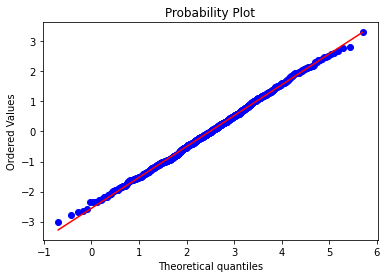

In [8]:
stats.probplot(datos, dist="norm", sparams=(2.5,),plot=plt)
plt.show()

In [9]:
stats.kstest(datos, 'norm')

KstestResult(statistic=0.02546168846949254, pvalue=0.5273511680492223)

 Qué significa que pvalue> 0.05 ? Pueden describir el resultado del Q-Q plot?

### Ahora veamos un ejemplo de otros sets de datos

Distribución exponencial

In [10]:
expo = np.random.exponential(size = 1000)

In [11]:
stats.kstest(expo , 'norm')

KstestResult(statistic=0.5004290273646426, pvalue=3.998930801548828e-232)

C:\Users\tele\Miniconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 8.0)

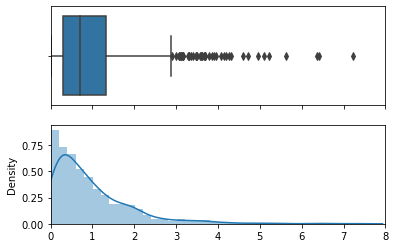

In [12]:
f, axes = plt.subplots(2, 1, sharex=True)
sns.boxplot(x = expo, ax=axes[0])
sns.distplot(expo, ax=axes[1])
plt.xlim(0,8)

Distribución de Poisson

In [13]:
pois = np.random.poisson(2, size = 1000)
pois[:20]

array([2, 0, 1, 1, 2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 3, 2, 3, 6, 3, 0])

C:\Users\tele\Miniconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-2.0, 10.0)

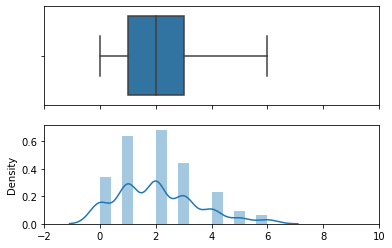

In [14]:
f, axes = plt.subplots(2, 1, sharex=True)
sns.boxplot(x = pois, ax=axes[0])
sns.distplot(pois, ax=axes[1])
plt.xlim(-2, 10)

Distribucion bimodal

In [15]:
nuevosDatos = np.concatenate( [np.random.normal(10,1,500), np.random.normal(20,1,500)] )

C:\Users\tele\Miniconda3\envs\acamica\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

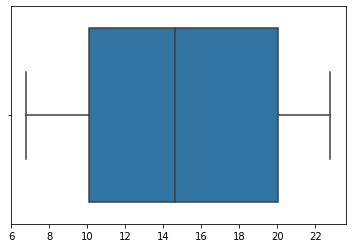

In [16]:
sns.boxplot(nuevosDatos, whis = 1.5)

C:\Users\tele\Miniconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

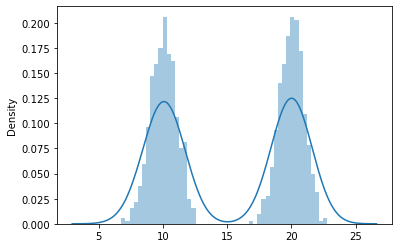

In [17]:
sns.distplot(nuevosDatos, bins=50)

#### En estos casos que métrica usaria? Z-score o rango intercuartílico?

### Extra: Outliers multivariados

Ahora que sabemos cómo detectar los outliers, es importante entender si se necesita removerlos o corregirlos. En la próxima sección vamos a considerar algunos métodos para remover los outliers o imputarles otros valores.

El scatter plot (o diagrama de dispersión) es un gráfico que muestra valores observados en dos variables.

In [18]:
x = np.sort(np.random.normal(0,10,40))
y = np.sort(np.random.normal(5,36,40))
y[10] = 25

C:\Users\tele\Miniconda3\envs\acamica\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

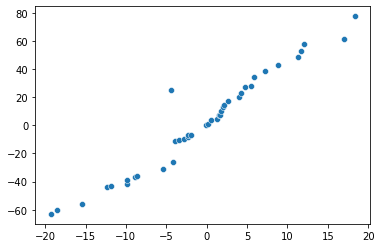

In [19]:
sns.scatterplot(x,y)

**Identificar outliers multivariados no es fácil. Los outliers univariados, o valores extremos en una variable, son fácilmente identificables a través de un simple histograma. Los outliers bivariados como los presentados en el anterior gráfico también pueden ser identificados visualmente. Sin embargo, para el caso de más de dos variables, puede suceder que una observación no sea outlier en dos dimensiones pero si en tres o cuatro, lo que ya no es visible fácilmente. Un estimador común para detectar valores extremos multivariados es la Distancia de Mahalanobis (DM)**. 

La distancia de Mahalanobis es una medida de distancia introducida por Mahalanobis en 1936. Su utilidad radica en que es una forma de determinar la similitud entre dos variables aleatorias multidimensionales (https://es.wikipedia.org/wiki/Distancia_de_Mahalanobis).

### Recordando: 
**¿Cuál es la diferencia entre pruebas paramétricas y no paramétricas?**

Las pruebas paramétricas asumen distribuciones estadísticas subyacentes a los datos. Por tanto, deben cumplirse algunas condiciones de validez, de modo que el resultado de la prueba paramétrica sea fiable. Por ejemplo, la prueba t de Student para dos muestras independientes será fiable solo si cada muestra se ajusta a una distribución normal y si las varianzas son homogéneas.

Las pruebas no paramétricas no deben ajustarse a ninguna distribución. Pueden por tanto aplicarse incluso aunque no se cumplan las condiciones de validez paramétricas.